In [10]:
import pandas as pd

df = pd.read_csv('/content/heart.csv')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df

,Age,Sex,CheastPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
df.shape

(1025, 14)

In [13]:
# Проверка на пропущенные

df.isnull().sum()

,0
Age,0
Sex,0
CheastPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [14]:
# Описание

df.describe(include='all')

,Age,Sex,CheastPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1025 non-null   int64  
 1   Sex              1025 non-null   int64  
 2   CheastPainType   1025 non-null   int64  
 3   RestingBP        1025 non-null   int64  
 4   Cholesterol      1025 non-null   int64  
 5   FastingBS        1025 non-null   int64  
 6   RestingECG       1025 non-null   int64  
 7   MaxHR            1025 non-null   int64  
 8   ExerciseAngina   1025 non-null   int64  
 9   Oldpeak          1025 non-null   float64
 10  ST_Slope         1025 non-null   int64  
 11  NumMajorVessels  1025 non-null   int64  
 12  Thal             1025 non-null   int64  
 13  Target           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [16]:
df['Target'].unique()

array([0, 1])

<Axes: >

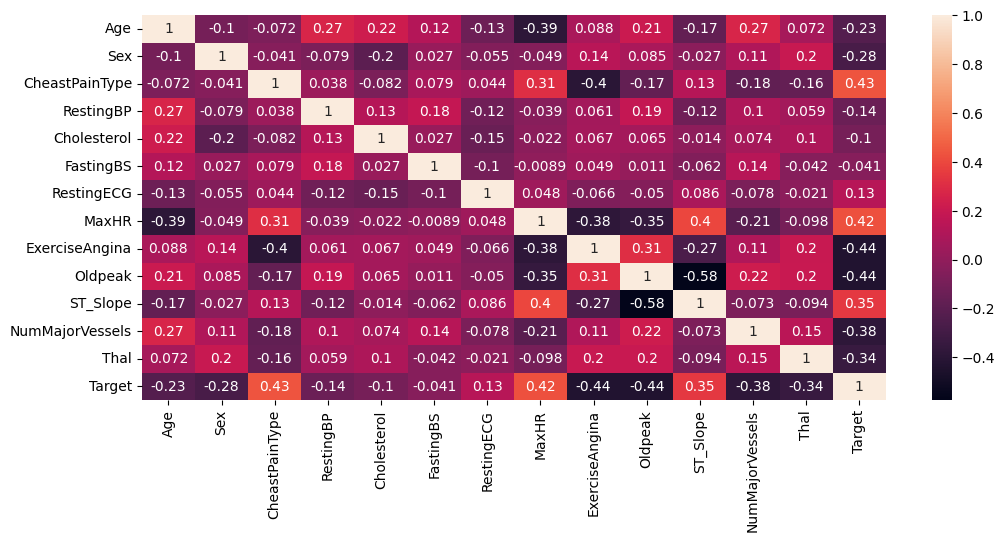

In [18]:
# Корелляция

plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

Видно довольно сильную положительную корелляцию таргета с максимальной достигнутой частотой сердечных сокращений, типом грудной боли и наклоном ST сегмента

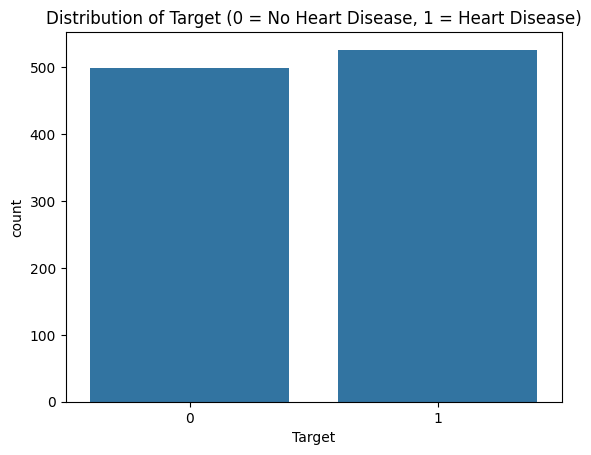

In [19]:
sns.countplot(x='Target',data=df)
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

In [20]:
countNoDisease = len(df[df.Target == 0])
countHaveDisease = len(df[df.Target == 1])

print("Patience without heart problems: ", countNoDisease)
print("Patience with heart problems: ", countHaveDisease)

Patience without heart problems:  499
Patience with heart problems:  526


## Проанализируем признаки

### Возраст

## Пол

<Axes: xlabel='Sex', ylabel='Target'>

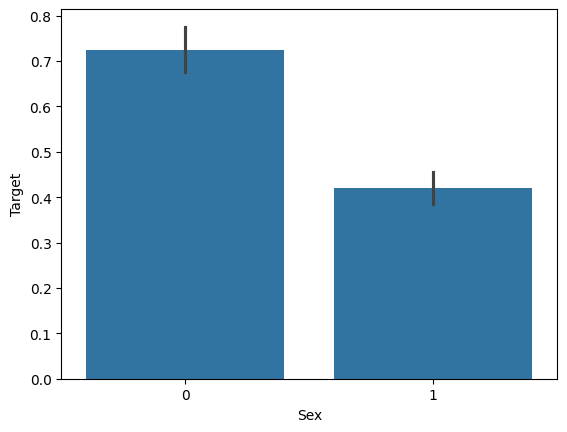

In [22]:
y = df['Target']
sns.barplot(x=df["Sex"],y=y)

У мужчин проблемы с сердцем встречаются реже

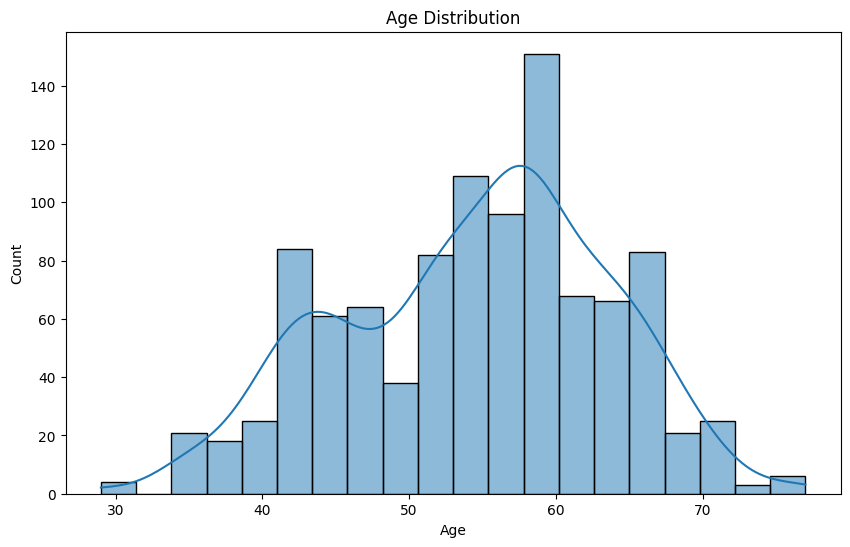

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

## Уровень сахара

<Axes: xlabel='FastingBS', ylabel='Target'>

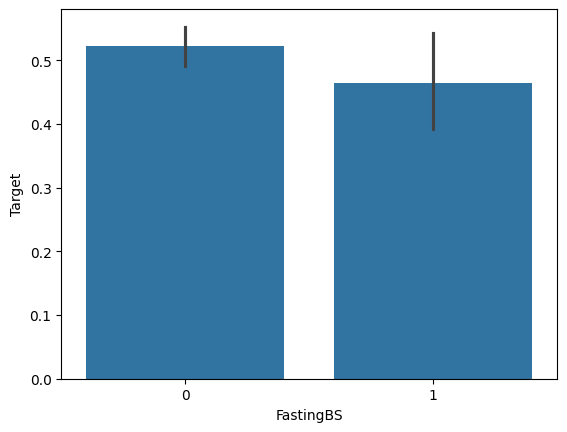

In [24]:
sns.barplot(x=df["FastingBS"],y=y)

## Тип боли в груди

<Axes: xlabel='CheastPainType', ylabel='Target'>

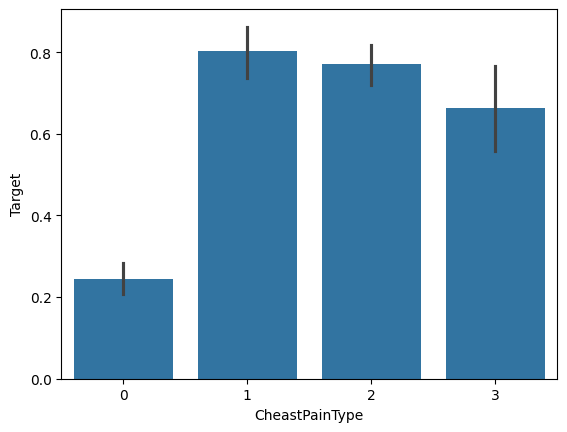

In [23]:
sns.barplot(x=df["CheastPainType"], y=y)

## Cтенокардия, вызванная физической нагрузкой

<Axes: xlabel='ExerciseAngina', ylabel='Target'>

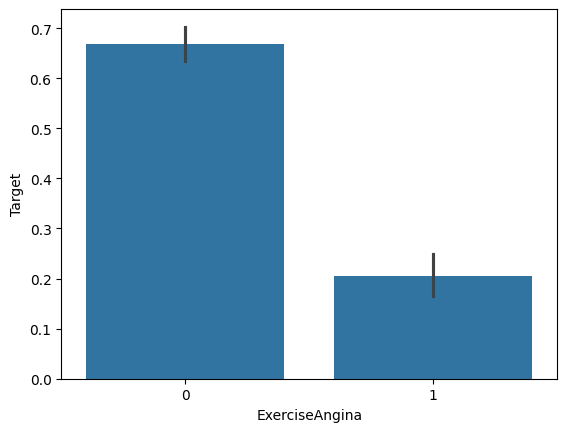

In [26]:
sns.barplot(x=df["ExerciseAngina"],y=y)

## Результаты электрокардиографии в состоянии покоя

<Axes: xlabel='RestingECG', ylabel='Target'>

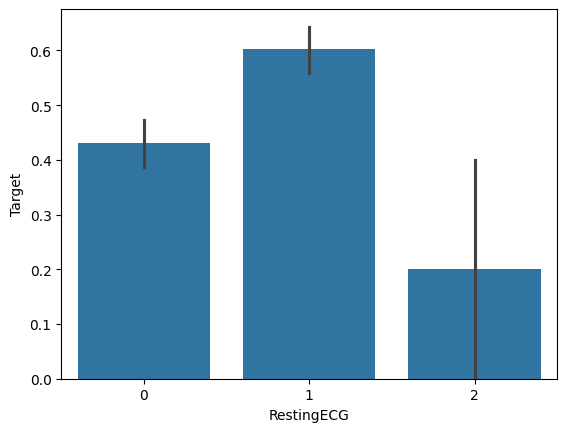

In [25]:
sns.barplot(x=df["RestingECG"],y=y)

## Наклон сегмента ST при пиковой нагрузке

<Axes: xlabel='ST_Slope', ylabel='Target'>

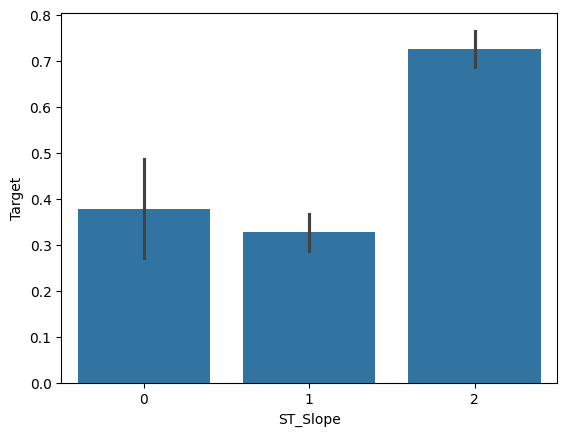

In [27]:
sns.barplot(x=df["ST_Slope"], y=y)

## Количество крупных сосудов , окрашенных с помощью флюороскопии

<Axes: xlabel='NumMajorVessels', ylabel='Target'>

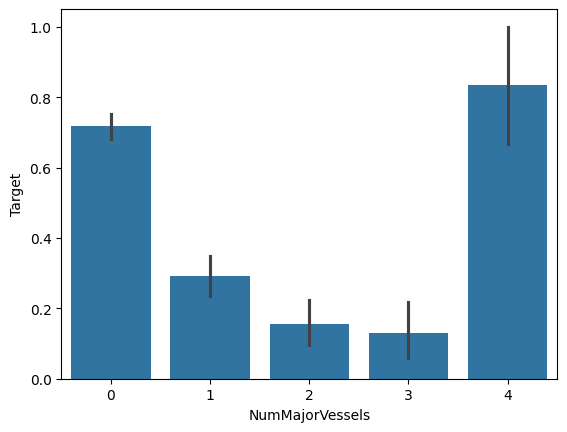

In [28]:
sns.barplot(x=df["NumMajorVessels"], y=y)

## Thal

<Axes: xlabel='Thal', ylabel='Target'>

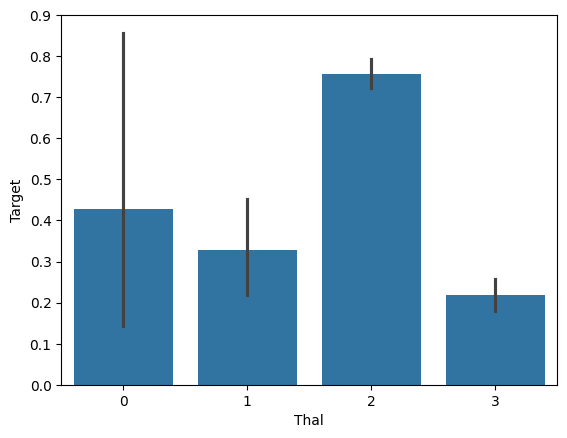

In [29]:
sns.barplot(x=df["Thal"], y=y)

## Pairplot

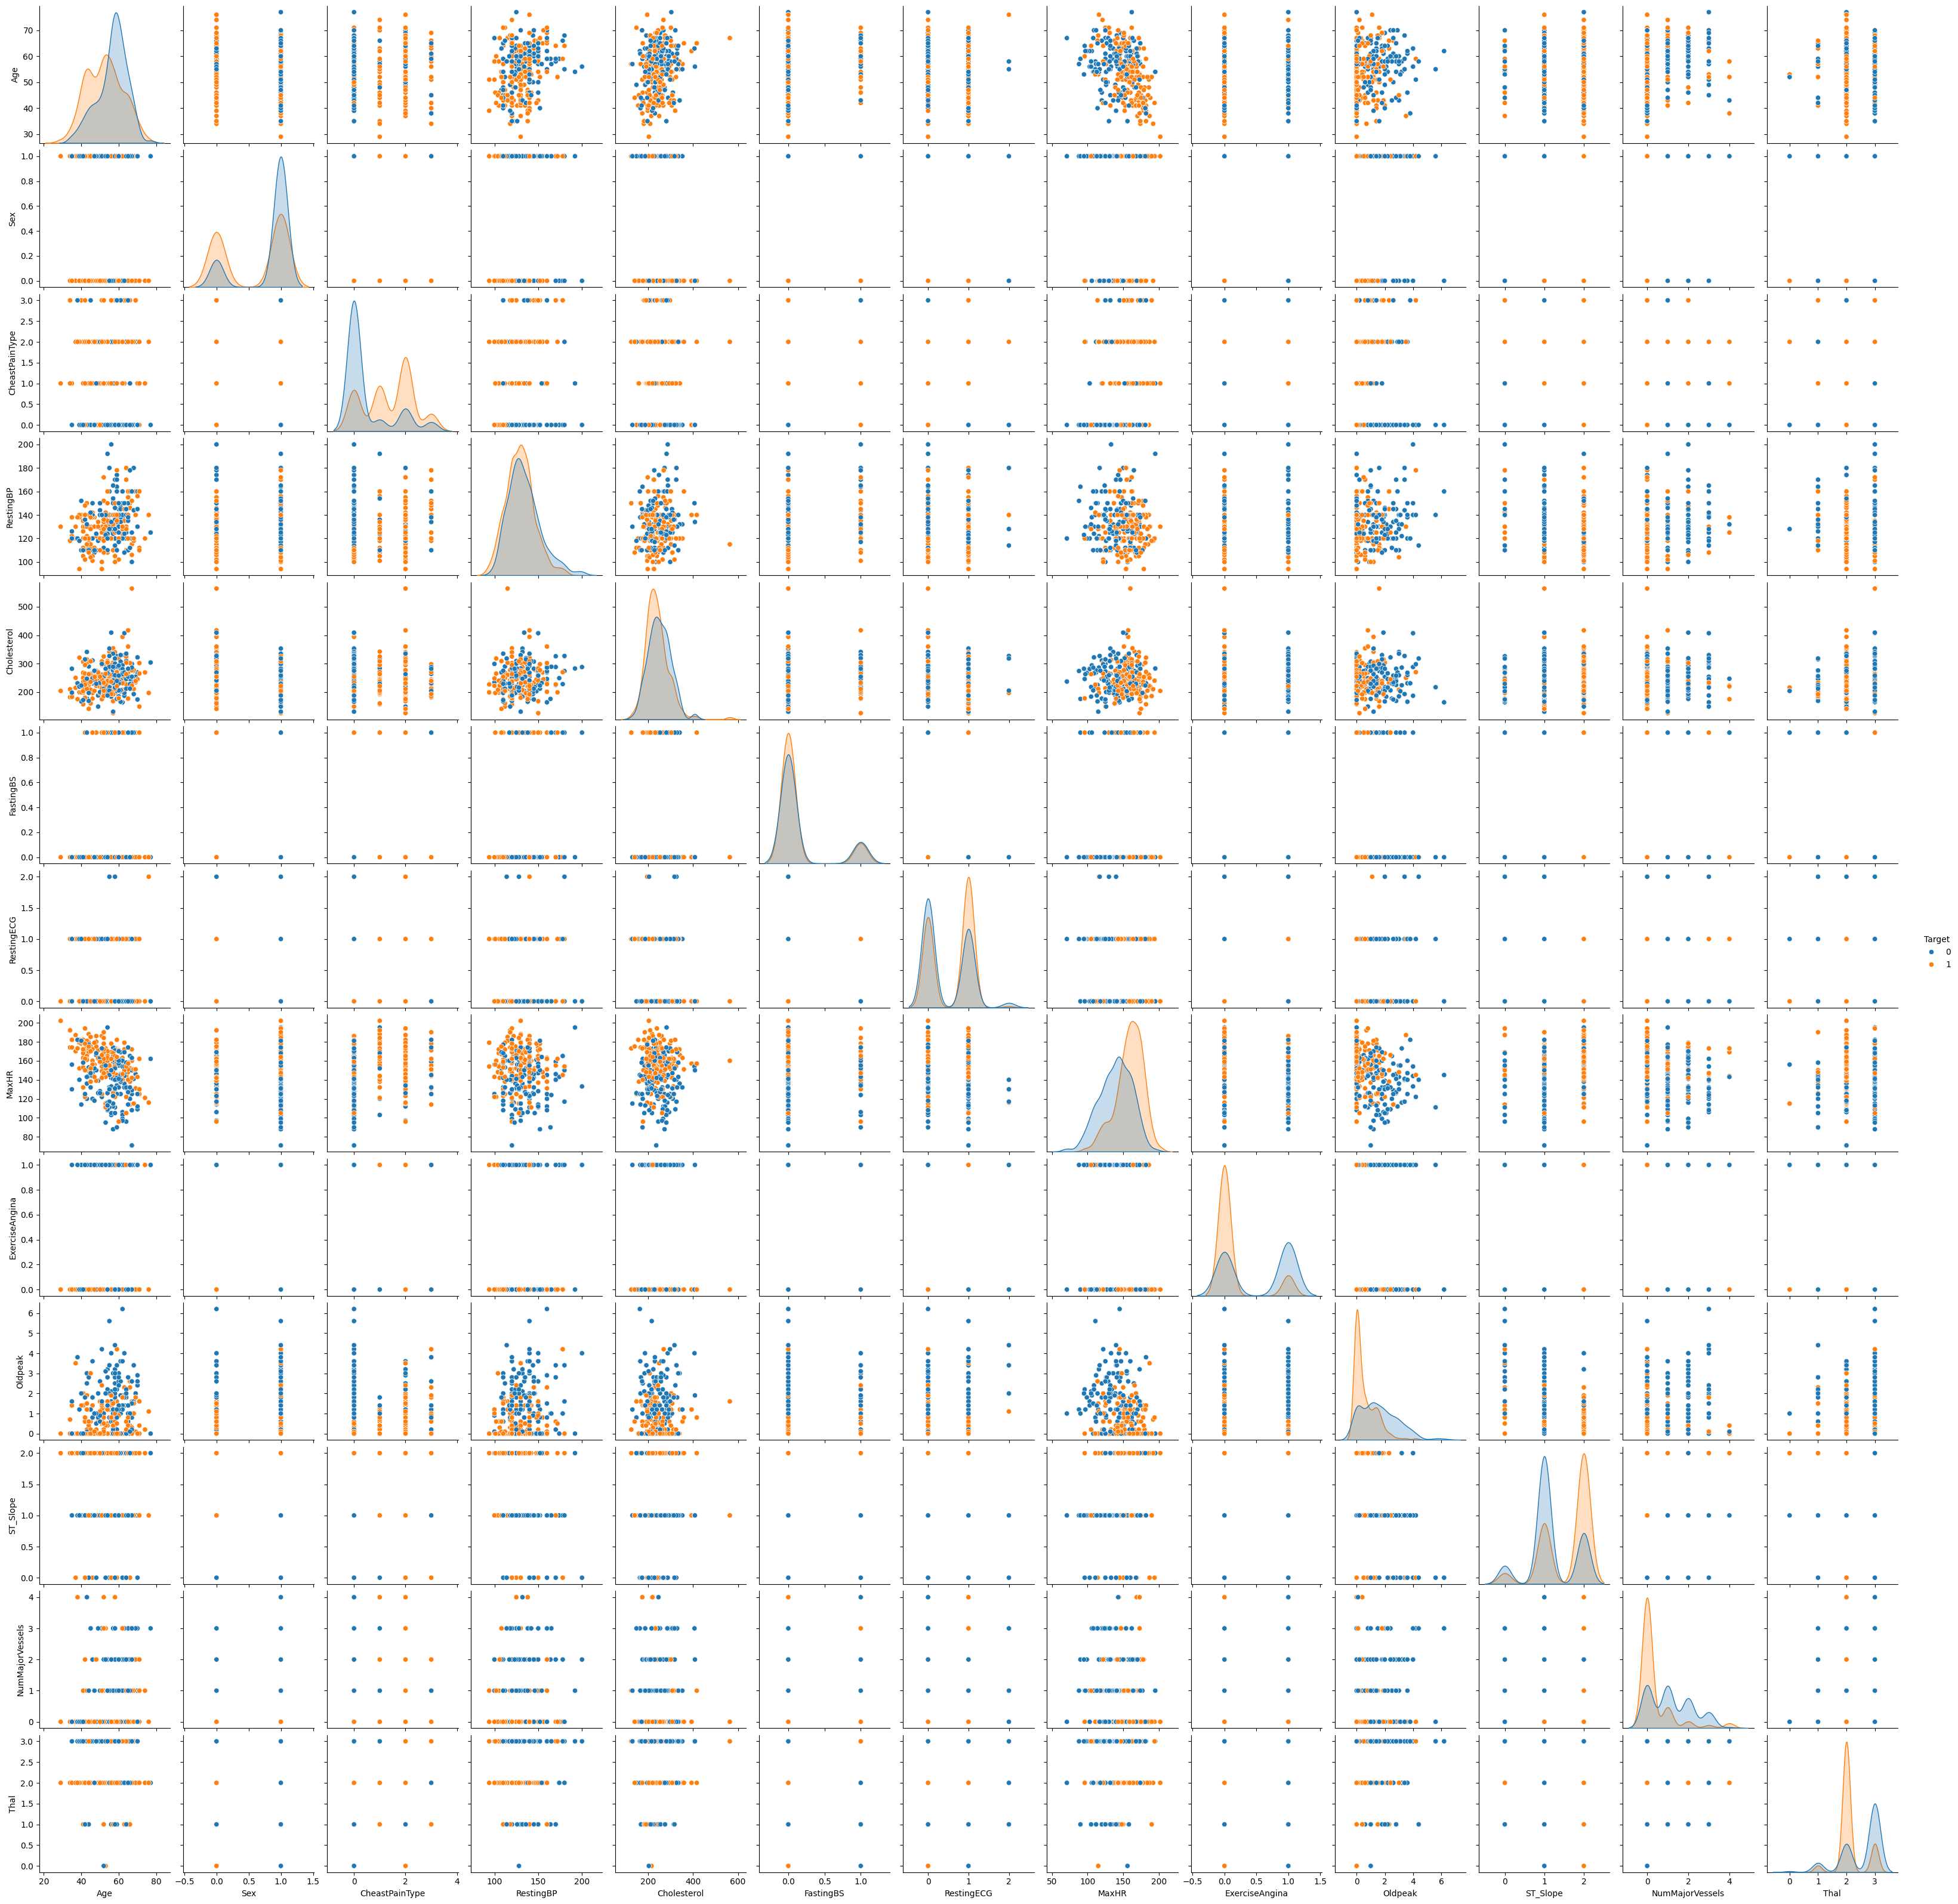

In [30]:
sns.pairplot(df, hue='Target')
plt.show()